<a href="https://colab.research.google.com/github/Pree-om/deep-learning/blob/main/vanishing_n_exploding_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.datasets import make_moons
import warnings
warnings.filterwarnings('ignore')

In [73]:
#generate datasets
X, y = make_moons(n_samples=100, noise=0.01, random_state=42)
print(X.shape)

(100, 2)


In [74]:
#create dataframe of the dataset
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
df.head()

,x1,x2,y
0,1.524756,-0.364210,1
1,0.023201,0.321878,1
2,0.717588,-0.452697,1
3,-0.976258,0.252535,0
4,-0.934366,0.303869,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   y       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [76]:
df.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,0.500479,0.249603,0.500000
std,0.877328,0.492581,0.502519
min,-1.000923,-0.505630,0.000000
25%,-0.006312,-0.194824,0.000000
50%,0.495953,0.257213,0.500000
75%,1.009325,0.682422,1.000000
max,2.019629,1.008219,1.000000


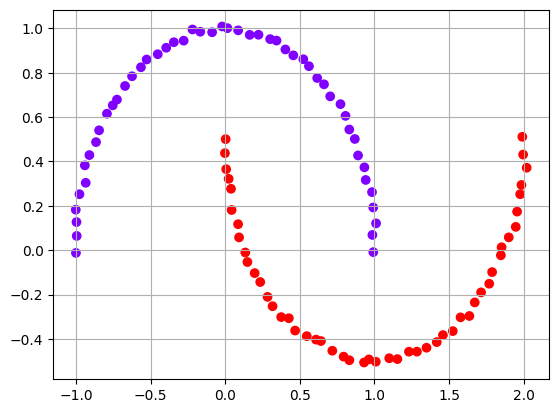

In [77]:
#visualizing the dataset
plt.scatter(df['x1'], df['x2'], c=df['y'], cmap='rainbow')
plt.grid()
plt.show()

In [78]:
#create the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

initializer = tf.keras.initializers.RandomUniform(minval=-3.5, maxval=3.5, seed=None)
#initializer = tf.keras.initializers.GlorotUniform()
#initializer = tf.keras.initializers.HeUniform()
#initializer = tf.keras.initializers.GlorotNormal()
model=Sequential()
model.add(Dense(10, activation='sigmoid',input_dim=2, kernel_initializer=initializer))
model.add(Dense(10, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(10, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(10, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(10, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(10, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(10, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(10, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 811 (3.17 KB)

 Trainable params: 811 (3.17 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.get_weights()

[array([[-3.3342702 , -0.6583171 , -2.2225192 ,  2.3157797 , -2.7373714 ,
         -0.05802441,  1.2135668 , -1.7940664 ,  0.10297871, -1.4467077 ],
        [-0.3495674 ,  2.4065948 ,  0.57302475,  2.5918226 ,  0.23507214,
         -1.6539264 ,  2.273162  , -1.5579045 , -2.1692362 ,  2.5150266 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-3.3342702 , -0.6583171 , -2.2225192 ,  2.3157797 , -2.7373714 ,
         -0.05802441,  1.2135668 , -1.7940664 ,  0.10297871, -1.4467077 ],
        [-0.3495674 ,  2.4065948 ,  0.57302475,  2.5918226 ,  0.23507214,
         -1.6539264 ,  2.273162  , -1.5579045 , -2.1692362 ,  2.5150266 ],
        [-1.5847818 , -0.09809542,  2.1134682 , -0.8933306 , -2.7687473 ,
          1.6820779 , -3.1844537 ,  3.4223347 , -3.0401921 ,  0.07057476],
        [ 2.9204116 ,  1.1410952 ,  0.67270565,  2.9869518 , -2.5445075 ,
          2.81982   , -2.3898053 , -0.98785067,  0.1285119 ,  0.16120362],
        [-1.91558

In [80]:
#compile and train
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam',metrics=['accuracy'])
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.5109 - loss: 0.6988 - val_accuracy: 0.6000 - val_loss: 0.6753
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4406 - loss: 0.7160 - val_accuracy: 0.6000 - val_loss: 0.6762
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5070 - loss: 0.6969 - val_accuracy: 0.6000 - val_loss: 0.6770
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4719 - loss: 0.7036 - val_accuracy: 0.6000 - val_loss: 0.6781
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4836 - loss: 0.6992 - val_accuracy: 0.6000 - val_loss: 0.6793
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4953 - loss: 0.6957 - val_accuracy: 0.6000 - val_loss: 0.6806
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4875 - loss: 0.6957 - val_accuracy: 0.6000 - val_loss: 0.6821
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5031 - loss: 0.6926 - val_accuracy: 0.6000 - val_loss

In [81]:
model.get_weights()

[array([[-3.291308  , -0.66811466, -1.950731  ,  2.0874436 , -2.382626  ,
         -0.47201303,  1.2702156 , -1.8360429 ,  0.4475676 , -1.2829987 ],
        [-0.07637921,  2.6787817 ,  0.8074483 ,  2.2585433 ,  0.5344192 ,
         -1.7803068 ,  2.0364687 , -1.6321882 , -2.2757394 ,  2.9403255 ]],
       dtype=float32),
 array([-0.26118773, -0.05278453,  0.31113482, -0.1970152 ,  0.12196565,
        -0.10602398, -0.12106981,  0.37085313,  0.26698792,  0.36022428],
       dtype=float32),
 array([[-3.5158536 , -0.5057569 , -2.2466216 ,  2.321805  , -2.8870206 ,
         -0.10186343,  1.4074996 , -1.6542753 ,  0.261497  , -1.3416908 ],
        [-0.7357709 ,  2.7167792 ,  0.5127602 ,  2.4092047 , -0.04214623,
         -1.5706726 ,  2.6124659 , -1.8348491 , -2.3512695 ,  2.180849  ],
        [-1.9448185 ,  0.1527723 ,  2.1138895 , -1.0171634 , -3.0392156 ,
          1.640416  , -2.8960733 ,  3.3475006 , -3.0083456 , -0.09603518],
        [ 2.5281677 ,  1.1032044 ,  0.82883966,  2.5715938 , 

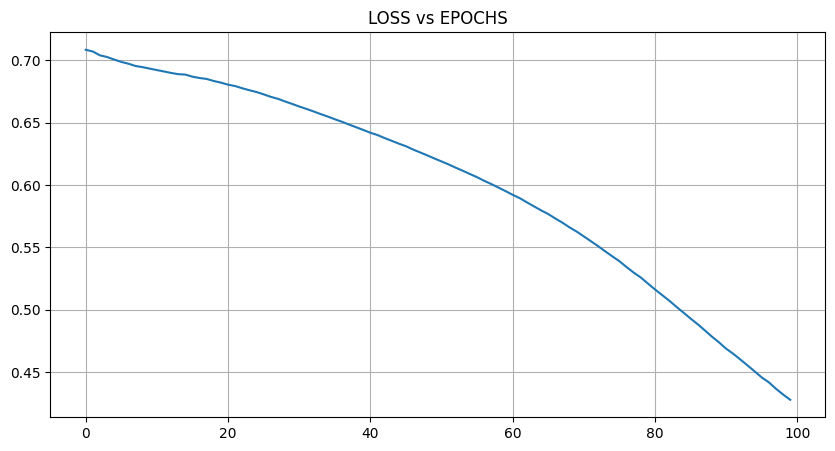

In [82]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='loss')
plt.title('LOSS vs EPOCHS')
plt.grid()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 962us/step


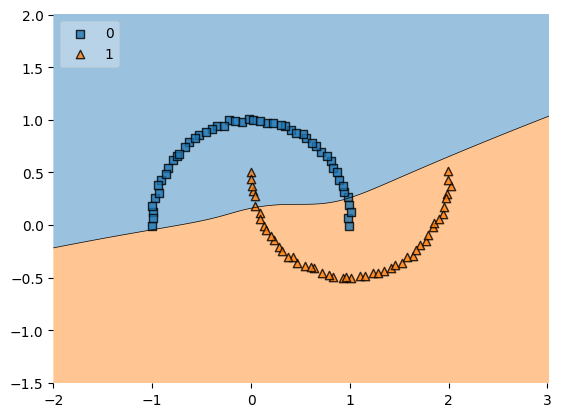

In [83]:
#plot decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.astype('int'), clf=model,legend=2)
plt.show()